# Info for future me

Opening WAV files (WAV file is easy to open as numpy array). Also says how to write back into WAV files (could be useful when wanting to listen to filtered signals).

https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3

Software to convert from p4a to WAV files

https://www.apowersoft.com/free-online-video-converter

# Prelimary Stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp; from scipy.io import wavfile; from scipy import signal
import pydub
from pydub import AudioSegment

## Compare Different Notes


Open up audio data. Obtain the sampling frequency (rate) and the data. Since the data contains sound volume for left and right ear, only take the left ear (convert to mono).

In [2]:
rate_E, data_E = sp.io.wavfile.read('sound_recs/ac_E.wav')
data_E = np.array([data_E[i][0] for i in range(len(data_E))])

rate_A, data_A = sp.io.wavfile.read('sound_recs/ac_A.wav')
data_A = np.array([data_A[i][0] for i in range(len(data_A))])

rate_D, data_D = sp.io.wavfile.read('sound_recs/ac_D.wav')
data_D = np.array([data_D[i][0] for i in range(len(data_D))])

Use scipy package to obtain the periodograms for the data.

In [3]:
f_E, Pxx_den_E = signal.periodogram(data_E, rate_E)
f_A, Pxx_den_A = signal.periodogram(data_A, rate_A)
f_D, Pxx_den_D = signal.periodogram(data_D, rate_D)

Do some preliminary plotting.

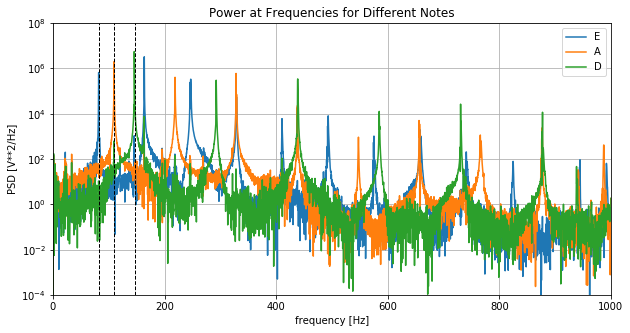

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.semilogy(f_E, Pxx_den_E, label='E')
ax.semilogy(f_A, Pxx_den_A, label='A')
ax.semilogy(f_D, Pxx_den_D, label='D')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')
ax.set_xlim(0,1000)
ax.set_ylim(10**-4, 10**8)
ax.legend()
ax.grid()
ax.set_title('Power at Frequencies for Different Notes')


# Main Frequencies of a Guitar in Tune
ax.axvline(82.4, ls='--', color='k', lw=1)
ax.axvline(110, ls='--', color='k', lw=1)
ax.axvline(146.83, ls='--', color='k', lw=1)

plt.show()

## Compare Muted vs. Non-Muted Note

Open Data

In [5]:
rate_E_mute, data_E_mute = sp.io.wavfile.read('sound_recs/ac_E_mute.wav')
data_E_mute = np.array([data_E_mute[i][0] for i in range(len(data_E_mute))])

Get periodogram

In [6]:
f_E_mute, Pxx_den_E_mute = signal.periodogram(data_E_mute, rate_E_mute)

Plot

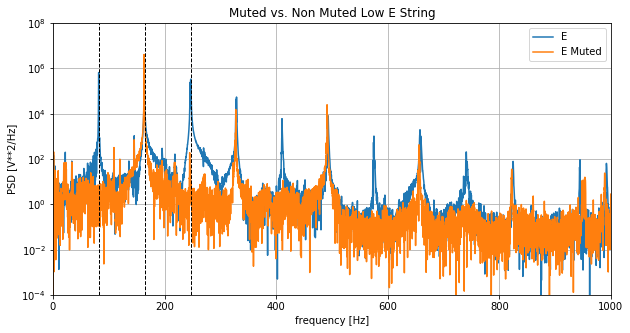

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.semilogy(f_E, Pxx_den_E, label='E')
ax.semilogy(f_E_mute, Pxx_den_E_mute, label='E Muted')

ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')
ax.set_xlim(0,1000)
ax.set_ylim(10**-4, 10**8)
ax.legend()
ax.grid()
ax.set_title('Muted vs. Non Muted Low E String')


# Main Frequencies of a Guitar in Tune
ax.axvline(82.4, ls='--', color='k', lw=1)
ax.axvline(82.4*2, ls='--', color='k', lw=1)
ax.axvline(82.4*3, ls='--', color='k', lw=1)

plt.show()

As expected the odd modes are removed.